In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from pyspark.sql import *
import pyspark.sql.functions as f
%matplotlib inline

spark = SparkSession.builder.getOrCreate()

In [2]:
refugees = spark.read.parquet('./data_frame_2.parquet')

In [3]:
country_codes = ['AU','BE','BU','HR','CY','EZ','DK','EN','FI','FR','GM','GR','HU','EI','IT','LG','LH','LU','MT','NL','PL','PO','RO','LO','SI','SP','SW','UK','NO','LS','IC','SZ', 'TU']

european_refugees_2 = refugees.where(f.col('ActionGeo_CountryCode').isin(country_codes))

In [4]:
european_refugees_2.count()

301629

In [6]:
european_refugees.columns

['GLOBALEVENTID',
 'Day_DATE',
 'MonthYear_Date',
 'Year_Date',
 'FractionDate',
 'Actor1Code',
 'Actor1Name',
 'Actor1CountryCode',
 'Actor1KnownGroupCode',
 'Actor1EthnicCode',
 'Actor1Religion1Code',
 'Actor1Religion2Code',
 'Actor1Type1Code',
 'Actor1Type2Code',
 'Actor1Type3Code',
 'Actor2Code',
 'Actor2Name',
 'Actor2CountryCode',
 'Actor2KnownGroupCode',
 'Actor2EthnicCode',
 'Actor2Religion1Code',
 'Actor2Religion2Code',
 'Actor2Type1Code',
 'Actor2Type2Code',
 'Actor2Type3Code',
 'IsRootEvent',
 'EventCode',
 'EventBaseCode',
 'EventRootCode',
 'QuadClass',
 'GoldsteinScale',
 'NumMentions',
 'NumSources',
 'NumArticles',
 'AvgTone',
 'Actor1Geo_Type',
 'Actor1Geo_FullName',
 'Actor1Geo_CountryCode',
 'Actor1Geo_ADM1Code',
 'Actor1Geo_ADM2Code',
 'Actor1Geo_Lat',
 'Actor1Geo_Long',
 'Actor1Geo_FeatureID',
 'Actor2Geo_Type',
 'Actor2Geo_FullName',
 'Actor2Geo_CountryCode',
 'Actor2Geo_ADM1Code',
 'Actor2Geo_ADM2Code',
 'Actor2Geo_Lat',
 'Actor2Geo_Long',
 'Actor2Geo_FeatureID',

In [46]:
european_refugees_2.write.mode('overwrite').parquet("./european_refugees_2.parquet")

In [36]:
european_refugees_groupby_countries = european_refugees_2.groupby(f.col('ActionGeo_CountryCode'), f.col('Year_Date'))

In [43]:
european_refugees_filter_by_year = european_refugees_groupby_countries.count().where(f.col('Year_Date') >= 2015)

In [47]:
pd = european_refugees_filter_by_year.toPandas()

In [99]:
new_pd = pd[pd.Year_Date == '2015']

In [100]:
new_pd = new_pd.sort_values('count', ascending=True)

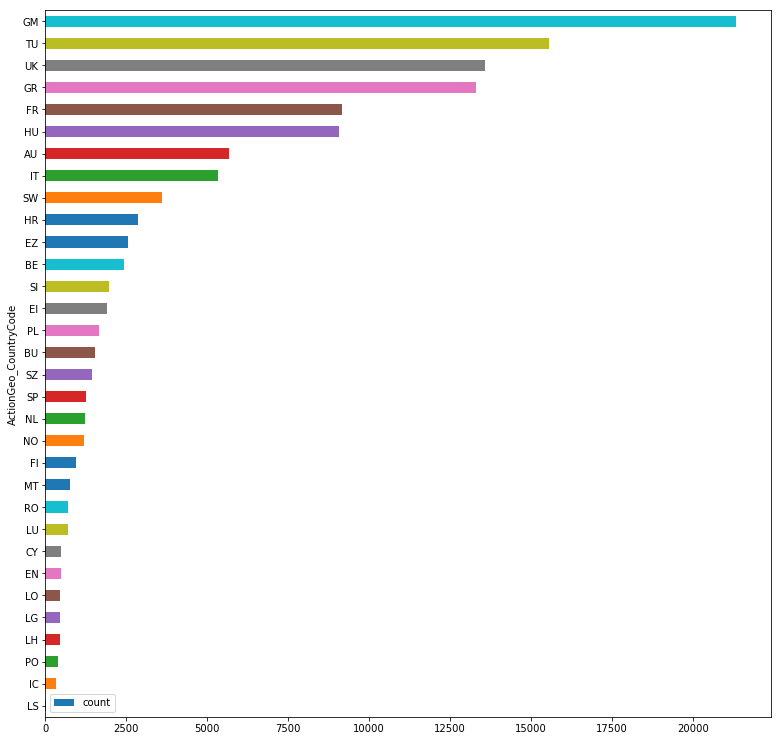

In [101]:
new_pd.plot.barh(x='ActionGeo_CountryCode', y='count', figsize = (13, 13))

In [103]:
european_refugees_2.where((f.col('Actor2CountryCode') == 'SYR') | (f.col('Actor1CountryCode') == 'SYR')).select('Actor1CountryCode', 'Actor2CountryCode', 'Actor1Geo_Fullname', 'Actor2Geo_Fullname', 'ActionGeo_CountryCode').show()

+-----------------+-----------------+--------------------+--------------------+---------------------+
|Actor1CountryCode|Actor2CountryCode|  Actor1Geo_Fullname|  Actor2Geo_Fullname|ActionGeo_CountryCode|
+-----------------+-----------------+--------------------+--------------------+---------------------+
|             null|              SYR|Geneva, Genè, Swi...|Geneva, Genè, Swi...|                   SZ|
|             null|              SYR|              Turkey|Zabadani, Rif Dim...|                   TU|
|             null|              SYR|              Turkey|              Turkey|                   TU|
|             null|              SYR|Chicago, Illinois...|              Turkey|                   TU|
|              SYR|             null|              Greece|               Syria|                   GR|
|              SYR|             null|Paris, RhôAlpes, ...|Paris, RhôAlpes, ...|                   FR|
|             null|              SYR|              Turkey|              Turkey|   

In [ ]:
pd = european_refugees.toPandas()

In [29]:
european_refugees_2.select('Actor1CountryCode', 'Actor2CountryCode', 'Actor1Geo_CountryCode', 'Actor2Geo_CountryCode', 'ActionGeo_CountryCode').show()

+-----------------+-----------------+---------------------+---------------------+---------------------+
|Actor1CountryCode|Actor2CountryCode|Actor1Geo_CountryCode|Actor2Geo_CountryCode|ActionGeo_CountryCode|
+-----------------+-----------------+---------------------+---------------------+---------------------+
|              DEU|             null|                   GM|                   GM|                   GM|
|              DEU|             null|                   GM|                   RP|                   GM|
|             null|             null|                   GM|                   GM|                   GM|
|              ITA|             null|                   SO|                   IT|                   IT|
|              ITA|             null|                   IT|                   IT|                   IT|
|              JOR|             null|                   GR|                   GR|                   GR|
|              NOR|             null|                   NO|     